# Customer Sales Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
df

,ORDER_NUMBER,QUANTITY_ORDERED,PRICE_EACH,ORDER_LINE_NUMBER,SALES,ORDER_DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COUNTRY,TERRITORY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME,DEAL_SIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004 00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03-01-2005 00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
df.shape

(2823, 25)

In [4]:
df.head()

,ORDER_NUMBER,QUANTITY_ORDERED,PRICE_EACH,ORDER_LINE_NUMBER,SALES,ORDER_DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COUNTRY,TERRITORY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME,DEAL_SIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.head().T

,0,1,2,3,4
ORDER_NUMBER,10107,10121,10134,10145,10159
QUANTITY_ORDERED,30,34,41,45,49
PRICE_EACH,95.7,81.35,94.74,83.26,100.0
ORDER_LINE_NUMBER,2,5,2,6,14
SALES,2871.0,2765.9,3884.34,3746.7,5205.27
ORDER_DATE,2/24/2003 0:00,05-07-2003 00:00,07-01-2003 00:00,8/25/2003 0:00,10-10-2003 00:00
STATUS,Shipped,Shipped,Shipped,Shipped,Shipped
QTR_ID,1,2,3,3,4
MONTH_ID,2,5,7,8,10
YEAR_ID,2003,2003,2003,2003,2003


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORDER_NUMBER        2823 non-null   int64  
 1   QUANTITY_ORDERED    2823 non-null   int64  
 2   PRICE_EACH          2823 non-null   float64
 3   ORDER_LINE_NUMBER   2823 non-null   int64  
 4   SALES               2823 non-null   float64
 5   ORDER_DATE          2823 non-null   object 
 6   STATUS              2823 non-null   object 
 7   QTR_ID              2823 non-null   int64  
 8   MONTH_ID            2823 non-null   int64  
 9   YEAR_ID             2823 non-null   int64  
 10  PRODUCT_LINE        2823 non-null   object 
 11  MSRP                2823 non-null   int64  
 12  PRODUCT_CODE        2823 non-null   object 
 13  CUSTOMER_NAME       2823 non-null   object 
 14  PHONE               2823 non-null   object 
 15  ADDRESS_LINE1       2823 non-null   object 
 16  ADDRES

<b style="color:blue; font-size:16px">Let's Check for Null Values</b>

In [7]:
pd.isnull(df).sum()

ORDER_NUMBER             0
QUANTITY_ORDERED         0
PRICE_EACH               0
ORDER_LINE_NUMBER        0
SALES                    0
ORDER_DATE               0
STATUS                   0
QTR_ID                   0
MONTH_ID                 0
YEAR_ID                  0
PRODUCT_LINE             0
MSRP                     0
PRODUCT_CODE             0
CUSTOMER_NAME            0
PHONE                    0
ADDRESS_LINE1            0
ADDRESS_LINE2         2521
CITY                     0
STATE                 1486
POSTAL_CODE             76
COUNTRY                  0
TERRITORY             1074
CONTACT_LAST_NAME        0
CONTACT_FIRST_NAME       0
DEAL_SIZE                0
dtype: int64

In [8]:
df.drop(columns=['ADDRESS_LINE2'], inplace=True)
# Shouldn't run this during analysis again, as this column is removed already

In [9]:
df.shape

(2823, 24)

In [10]:
df.columns

Index(['ORDER_NUMBER', 'QUANTITY_ORDERED', 'PRICE_EACH', 'ORDER_LINE_NUMBER',
       'SALES', 'ORDER_DATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCT_LINE', 'MSRP', 'PRODUCT_CODE', 'CUSTOMER_NAME', 'PHONE',
       'ADDRESS_LINE1', 'CITY', 'STATE', 'POSTAL_CODE', 'COUNTRY', 'TERRITORY',
       'CONTACT_LAST_NAME', 'CONTACT_FIRST_NAME', 'DEAL_SIZE'],
      dtype='object')

In [11]:
df.describe()

,ORDER_NUMBER,QUANTITY_ORDERED,PRICE_EACH,ORDER_LINE_NUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


<b style="color:blue; font-size:16px">Let's Check for any Outliers</b>

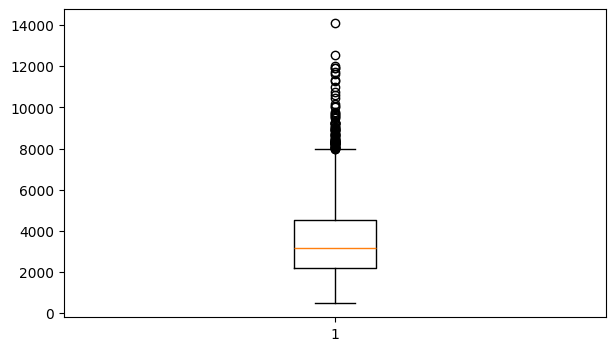

In [12]:
plt.figure(figsize=(7, 4))
plt.boxplot(df['SALES'])
plt.show()

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2818    False
2819    False
2820    False
2821    False
2822    False
Length: 2823, dtype: bool

In [14]:
df[df.duplicated()]

,ORDER_NUMBER,QUANTITY_ORDERED,PRICE_EACH,ORDER_LINE_NUMBER,SALES,ORDER_DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESS_LINE1,CITY,STATE,POSTAL_CODE,COUNTRY,TERRITORY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME,DEAL_SIZE


In [15]:
# Rename column
df.rename(columns= {'PRICE_EACH':'UNIT_PRICE'}, inplace=True)

In [16]:
df.columns

Index(['ORDER_NUMBER', 'QUANTITY_ORDERED', 'UNIT_PRICE', 'ORDER_LINE_NUMBER',
       'SALES', 'ORDER_DATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCT_LINE', 'MSRP', 'PRODUCT_CODE', 'CUSTOMER_NAME', 'PHONE',
       'ADDRESS_LINE1', 'CITY', 'STATE', 'POSTAL_CODE', 'COUNTRY', 'TERRITORY',
       'CONTACT_LAST_NAME', 'CONTACT_FIRST_NAME', 'DEAL_SIZE'],
      dtype='object')

- <b style="color:purple">MSRP - Manufacturer's Suggested Retail Price</b>

<b style="color:blue; font-size:16px">Standardizing Order Date</b>

In [17]:
# standardizing the 'ORDER_DATE' Column
def standardize_date(date_str):
    try:
        return pd.to_datetime(date_str)
    except ValueError:
        return None
    
df['ORDER_DATE'] = df['ORDER_DATE'].apply(standardize_date)
df

,ORDER_NUMBER,QUANTITY_ORDERED,UNIT_PRICE,ORDER_LINE_NUMBER,SALES,ORDER_DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESS_LINE1,CITY,STATE,POSTAL_CODE,COUNTRY,TERRITORY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME,DEAL_SIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,981-443655,Torikatu 38,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


## Date Handling

<b style="color:blue; font-size:16px">Day of the Week</b>

In [18]:
# Adding a column for the day of the week
df['DAY_OF_WEEK'] = df['ORDER_DATE'].dt.day_name()

In [19]:
df['DAY_OF_WEEK']

0          Monday
1       Wednesday
2         Tuesday
3          Monday
4          Friday
          ...    
2818     Thursday
2819       Monday
2820      Tuesday
2821       Monday
2822       Friday
Name: DAY_OF_WEEK, Length: 2823, dtype: object

In [20]:
# Grouping and Summarizing
df.groupby('DAY_OF_WEEK')['SALES'].sum()

DAY_OF_WEEK
Friday       2140653.80
Monday       1254535.03
Saturday      420326.93
Sunday        421781.56
Thursday     1947412.20
Tuesday      1900773.29
Wednesday    1947146.04
Name: SALES, dtype: float64

In [21]:
sales_by_day = df.groupby('DAY_OF_WEEK', 
                          as_index=False)['SALES'].sum().sort_values(
    by='SALES', ascending=False)

sales_by_day

,DAY_OF_WEEK,SALES
0,Friday,2140653.80
4,Thursday,1947412.20
6,Wednesday,1947146.04
5,Tuesday,1900773.29
1,Monday,1254535.03
3,Sunday,421781.56
2,Saturday,420326.93


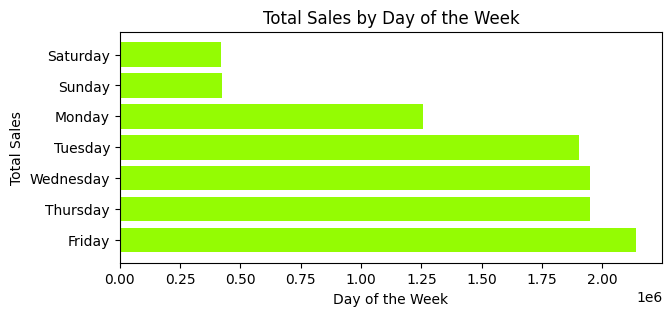

In [22]:
# Analyzing if Sales are higher on certain Days
plt.figure(figsize=(7, 3))
plt.barh(sales_by_day['DAY_OF_WEEK'], sales_by_day['SALES'], color = '#94fc03')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

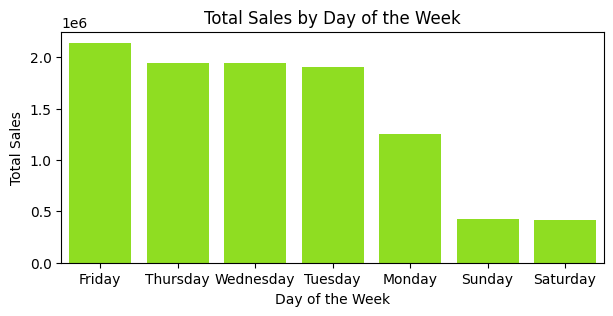

In [23]:
# Same as above
plt.figure(figsize=(7, 3))
sns.barplot(data = sales_by_day, x = 'DAY_OF_WEEK', y = 'SALES', color = '#94fc03')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

<b style="color:blue; font-size:16px">Seasonal Trends</b>

In [24]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['SEASON'] = df['ORDER_DATE'].dt.month.apply(get_season)
df[['ORDER_DATE', 'SEASON']].head()

,ORDER_DATE,SEASON
0,2003-02-24,Winter
1,2003-05-07,Spring
2,2003-07-01,Summer
3,2003-08-25,Summer
4,2003-10-10,Fall


In [25]:
sales_by_season = df.groupby('SEASON', 
                          as_index=False)['SALES'].sum().sort_values(
    by='SALES', ascending=False)

sales_by_season

,SEASON,SALES
0,Fall,3824825.16
1,Spring,2347864.91
3,Winter,2230995.46
2,Summer,1628943.32


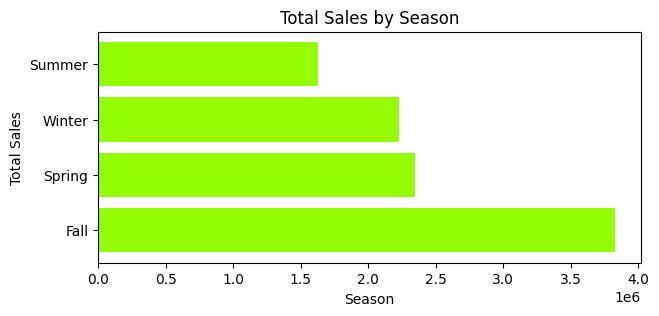

In [26]:
# Analyzing if there are any Seasonal effects on Sales
plt.figure(figsize=(7, 3))
plt.barh(sales_by_season['SEASON'], sales_by_season['SALES'], color = '#94fc03')
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

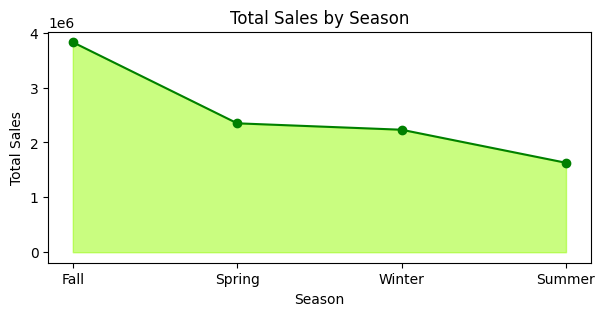

In [27]:
# Analyzing if there are any Seasonal effects on Sales (Same as Above)
plt.figure(figsize=(7, 3))
plt.fill_between(sales_by_season['SEASON'], sales_by_season['SALES'], 
                 color = '#94fc03', alpha = 0.5)
plt.plot(sales_by_season['SEASON'], sales_by_season['SALES'], 
         marker = 'o', color = 'g')
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

### Time Series Analysis

In [28]:
df['SALES'].head()

0    2871.00
1    2765.90
2    3884.34
3    3746.70
4    5205.27
Name: SALES, dtype: float64

In [29]:
df['SALES'].head(3).mean()

3173.7466666666664

<b style="color:blue; font-size:16px">Rolling Average</b>

In [30]:
df['SALES'].rolling(window=3).mean().head(10)

0            NaN
1            NaN
2    3173.746667
3    3465.646667
4    4278.770000
5    4143.910000
6    3727.600000
7    3829.950000
8    3392.876667
9    4129.766667
Name: SALES, dtype: float64

- <p style="color:purple">In time series analysis, 
    <b style="color:green">rolling(window=3).mean()</b> calculates the moving average over a specified window.</p>

- <p style="color:purple">Initially, there aren’t enough data points to fill the window. For example, with 
    <b style="color:green">window=3</b>, the first two positions won’t have enough data to calculate the average, hence they’ll show 
    <b style="color:green">NAN</b>. Once there are enough data points to fill the window, the moving average can be calculated, and we’ll start seeing values instead of 
    <b style="color:green">NANs</b>. This is normal and expected in rolling calculations.
</p>

- <p style="color:purple">Imagine it like a running average that slides along your data points, giving you a smoothed curve that can help you better understand the underlying patterns.</p>

- <p style="color:purple">
    <b style="color:green">Rolling averages</b> smooth out the data to reveal the underlying trend. For example, in sales data, they help you see overall growth or decline without being distracted by daily ups and downs.</p>
    
- <p style="color:purple">It might not feel intuitive at first, but think of it like looking at a city's skyline: zoom out to see the overall shape, not just individual buildings.</p>
    
- <b style="color:green">Rolling averages help you zoom out.</b>

<b style="color:blue; font-size:16px">Sales Over Time</b>

In [31]:
sales_by_qtr = df.groupby('QTR_ID', 
           as_index=False)['SALES'].sum().sort_values(
    by='SALES', ascending=False)

sales_by_qtr

,QTR_ID,SALES
3,4,3874780.01
0,1,2350817.73
1,2,2048120.30
2,3,1758910.81


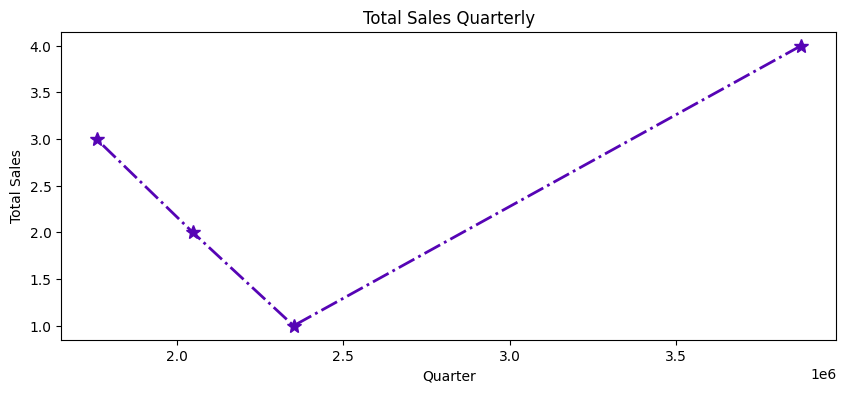

In [32]:
plt.figure(figsize=(10, 4))
plt.plot(sales_by_qtr['SALES'], sales_by_qtr['QTR_ID'], 
         '*', ms = 10, ls = '-.', lw = 2, c = '#5604b5')
plt.title('Total Sales Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

<div style="color:purple; border:2px solid green; padding:5px; ">
We can clearly see:
    <ul style="color:green; font-weight:bold;">
        <li>A trend in sales for the first two quarters, reaching the lowest point in the second quarter.</li>
        <li>From there, sales steadily increase over the remaining quarters, showing a clear upward trajectory.</li>
    </ul>
This pattern suggests a mid-year slump with a recovery in the latter half of the year.
</div>

In [33]:
sales_by_month = df.groupby('MONTH_ID', 
           as_index=False)['SALES'].sum().sort_values(
    by='SALES', ascending=False)

sales_by_month

,MONTH_ID,SALES
10,11,2118885.67
9,10,1121215.22
4,5,923972.56
1,2,810441.90
0,1,785874.44
2,3,754501.39
3,4,669390.96
7,8,659310.57
11,12,634679.12
8,9,584724.27


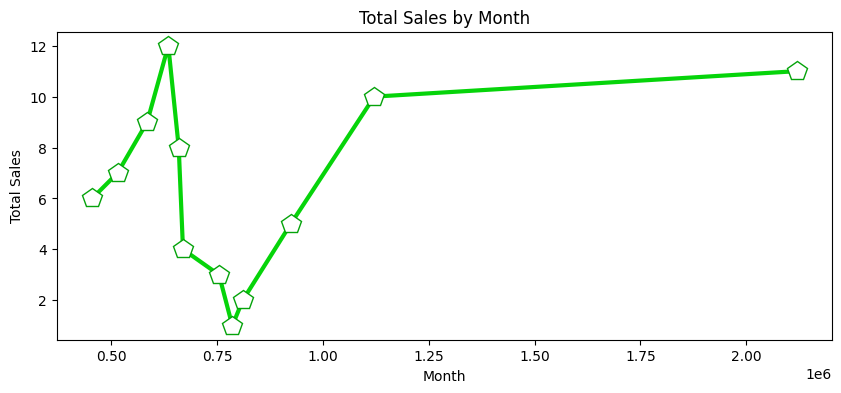

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(sales_by_month['SALES'], sales_by_month['MONTH_ID'], 
         'p', ms = 15, mfc = 'w', mec = '#05a30b', ls = '-', lw = 3, c = '#06d40a')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

<div style="color:purple; border:2px solid green; padding:5px; ">
In this graph, sales fluctuate widely on a monthly basis. We observe:
    <ul style="color:green; font-weight:bold;">
        <li>An initial increase, reaching a peak around mid-year, followed by a sharp decline.</li>
        <li>After the lowest point, sales start to recover and stabilize in the latter months, with a consistent upward trend toward the end.</li>
    </ul>
This indicates considerable variability in monthly sales, with some months performing significantly better than others.
</div>

In [35]:
sales_by_year = df.groupby('YEAR_ID', 
           as_index=False)['SALES'].sum().sort_values(
    by='SALES', ascending=False)

sales_by_year

,YEAR_ID,SALES
1,2004,4724162.60
0,2003,3516979.54
2,2005,1791486.71


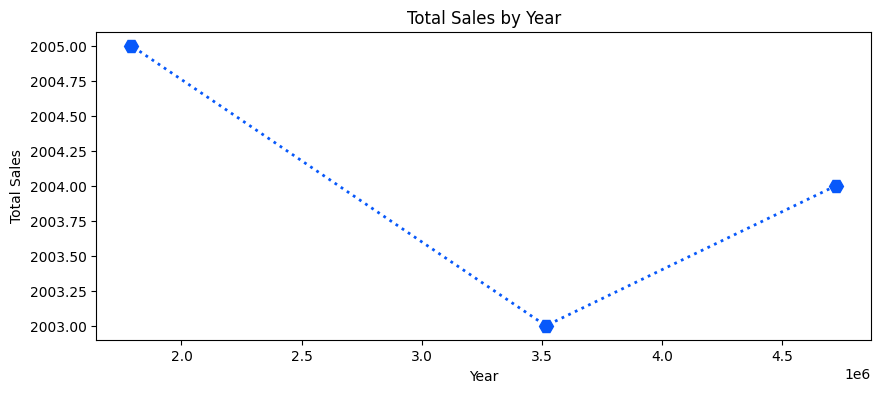

In [36]:
plt.figure(figsize=(10, 4))
plt.plot(sales_by_year['SALES'], sales_by_year['YEAR_ID'], 
        'H', ms = 10, ls = ':', lw = 2, c = '#0758fa')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

<div style="color:purple; border:2px solid green; padding:5px; ">
We can clearly see:
    <ul style="color:green; font-weight:bold;">
        <li>A significant increase in total sales in 2004.</li>
        <li style="color:red;">A sharp decline in total sales in 2005.</li>
        <li style="color:blue;">A significant drop in total sales from the first year to the second year, followed by a gradual recovery in the final year.</li>
    </ul>
This V-shaped trend indicates that sales initially declined but started to bounce back. However, sales have not yet reached the initial peak observed in the first year.
</div>

## Deeper Analytical Insights

### Product-level Analysis

<b style="color:blue; font-size:16px">Discounts</b>

In [37]:
# Adding a discount column
df['DISCOUNT'] = ((df['MSRP'] - df['UNIT_PRICE']) / df['MSRP']) * 100
df['DISCOUNT'] = round(df['DISCOUNT'].apply(lambda x: max(x, 0)), 2)

In [38]:
# Categorize Discounts
bins = [0, 10, 20, 30, 50, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-50%', '50-100%']
df['DISCOUNT_CATEGORY'] = pd.cut(df['DISCOUNT'], bins=bins, labels=labels, right=False)

In [39]:
sales_vol_by_discount = df.groupby('DISCOUNT_CATEGORY', 
                                   observed=False)['QUANTITY_ORDERED'].sum().reset_index()
sales_vol_by_discount

,DISCOUNT_CATEGORY,QUANTITY_ORDERED
0,0-10%,45780
1,10-20%,25594
2,20-30%,9521
3,30-50%,13996
4,50-100%,4176


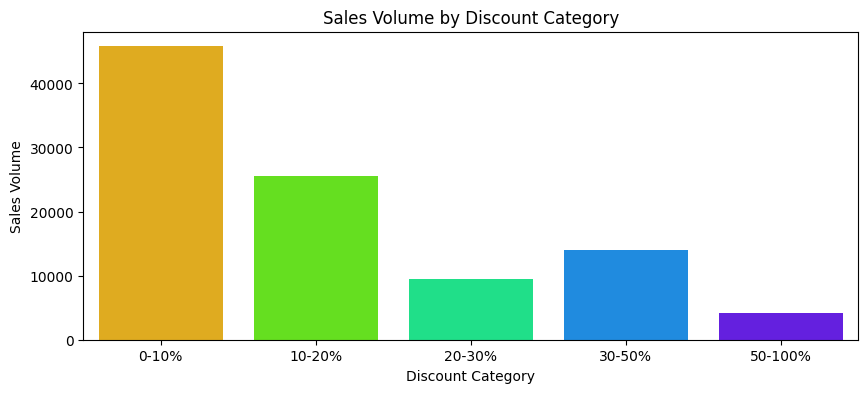

In [40]:
# Sales vs. Discounts
plt.figure(figsize=(10, 4))
sns.barplot(data = sales_vol_by_discount, x = 'DISCOUNT_CATEGORY', y = 'QUANTITY_ORDERED', 
            hue = 'DISCOUNT_CATEGORY', palette = 'gist_rainbow')
plt.title('Sales Volume by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Sales Volume')
plt.show()

<p style="color:purple">The 
    <b style="color:green">0-10%</b> discount category has the highest sales volume, indicating that smaller discounts are perhaps more frequent or applied to popular items. Sales volume decreases with higher discounts, peaking the lowest in the 
    <b style="color:green">50-100%</b> category.</p>

<b style="color:blue; font-size:16px">Product Categories</b>

In [41]:
sales_by_prod_cat = df.groupby('PRODUCT_LINE')['SALES'].sum().reset_index()
sales_by_prod_cat

,PRODUCT_LINE,SALES
0,Classic Cars,3919615.66
1,Motorcycles,1166388.34
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47
5,Trucks and Buses,1127789.84
6,Vintage Cars,1903150.84


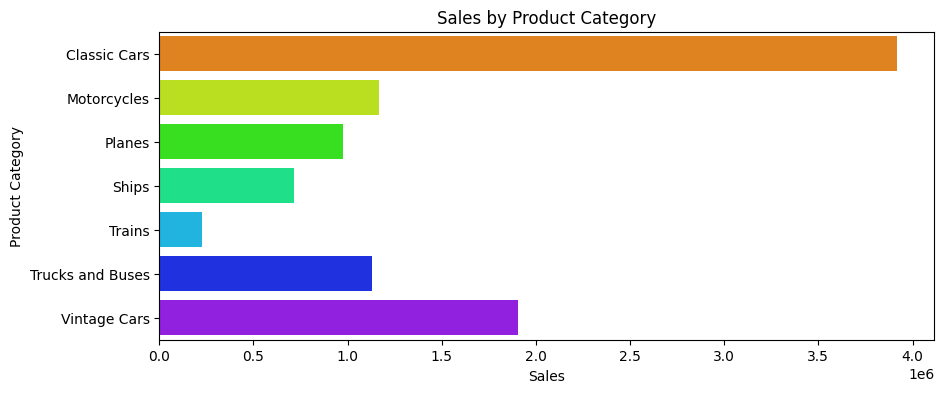

In [42]:
# Sales by Product Category
plt.figure(figsize=(10, 4))
sns.barplot(data = sales_by_prod_cat, x = 'SALES', y = 'PRODUCT_LINE',
            hue = 'PRODUCT_LINE', palette = 'gist_rainbow')
plt.title('Sales by Product Category')
plt.xlabel('Sales')
plt.ylabel('Product Category')
plt.show()

- <p style="color:purple">
    <b style="color:green">Classic Cars</b> are the top performers with the highest sales, followed by 
    <b style="color:green">Vintage Cars</b>. 
</p>
    
- <p style="color:purple">
    <b style="color:red">Trains</b> lag far behind. 
</p>

<p style="color:purple">This visual highlights which product lines drive the most revenue and which might need re-evaluation. Strategic focus on high performers like 
    <b style="color:green">Classic Cars</b> could maximize profitability.
</p>

<b style="color:blue; font-size:16px">Customer Analysis</b>

In [43]:
# Customer distribution by COUNTRY
customer_distribution = df.groupby('COUNTRY')['CUSTOMER_NAME']. \
                        nunique().sort_values(ascending=False).head(7)
customer_distribution

COUNTRY
USA          35
France       12
UK            5
Spain         5
Australia     5
Finland       3
Germany       3
Name: CUSTOMER_NAME, dtype: int64

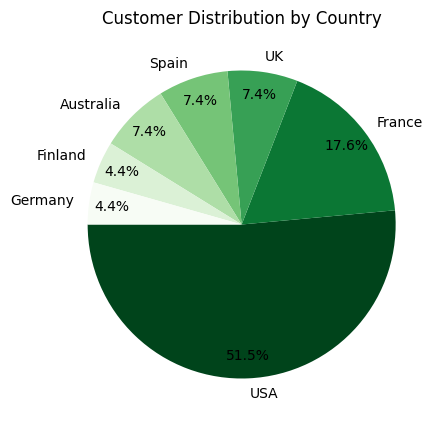

In [44]:
cmap = plt.get_cmap('Greens_r')
colors = cmap(np.linspace(0, 1, len(customer_distribution)))

plt.figure(figsize=(5, 5))
plt.pie(
    customer_distribution.values,
    labels = customer_distribution.index,
    startangle = 180,
    colors=colors,
    autopct='%1.1f%%',  # Shows percentage with 1 decimal place
    pctdistance=0.85,   # Position of the percentage labels
)
plt.title('Customer Distribution by Country')
plt.show()

- <p style="color:purple">
    <b style="color:purple">Dominance of the US Market</b>: The most significant portion of the customer base is concentrated in the United States, accounting for a substantial 
    <b style="color:green">51.5%</b> of the total customers. This indicates a strong presence and customer traction in the US market. 
</p>

- <p style="color:purple">
    <b style="color:purple">European Presence</b>: European countries like France, UK, Spain, Germany, and Finland collectively represent a significant portion of the customer base. This suggests a considerable presence and customer engagement in the European market.
</p>

- <p style="color:purple">
    <b style="color:purple">Australian Market</b>: Australia contributes 
    <b style="color:green">7.4%</b> to the overall customer distribution, indicating a notable presence in the Australian market.
</p>

<b style="color:purple">The US market holds the most significant share, emphasizing the importance of this market for the business.</b>

<b style="color:blue; font-size:16px">Order Analysis</b>

In [45]:
# Quantity ordered vs. ORDER_LINE_NUMBER
qty_ordered_per_line = df.groupby('ORDER_LINE_NUMBER')['QUANTITY_ORDERED'].sum()
qty_ordered_per_line

ORDER_LINE_NUMBER
1     10830
2     10343
3      9277
4      9116
5      8549
6      7942
7      6644
8      6615
9      5709
10     4987
11     4501
12     3711
13     3326
14     2834
15     1949
16     1465
17      914
18      355
Name: QUANTITY_ORDERED, dtype: int64

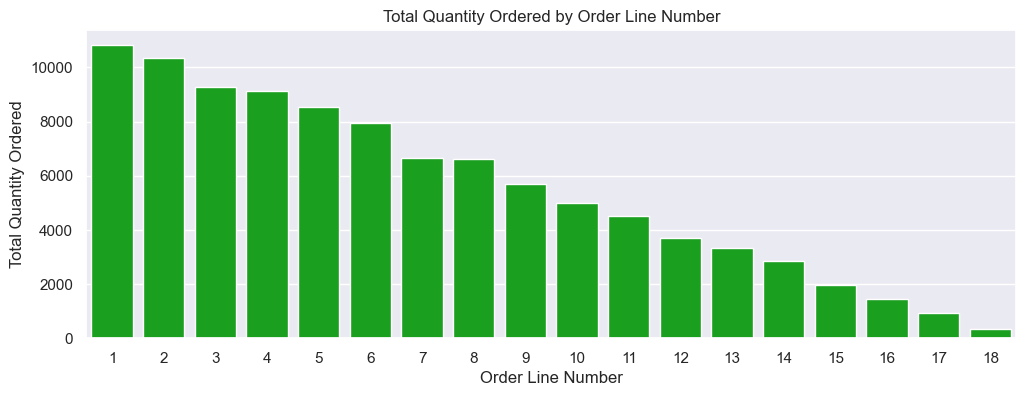

In [46]:
sns.set(rc = {'figure.figsize':(12, 4)})
sns.barplot(data = qty_ordered_per_line, color = '#04b509')

plt.title('Total Quantity Ordered by Order Line Number')
plt.xlabel('Order Line Number')
plt.ylabel('Total Quantity Ordered')
plt.show()

- <p style="color:purple">The chart clearly shows a descending trend in the total quantity ordered as the order line number increases. This suggests that the first few order lines typically have a higher demand compared to later ones.
</p>

- <p style="color:purple">The order line number likely corresponds to specific products or item variations. The initial peak for order line numbers
    <b style="color:green">1</b> or <b style="color:green">2</b> suggests that these products are either highly popular or heavily promoted.
</p>

<p style="color:purple">This information can be valuable for demand forecasting and planning purposes.</p>

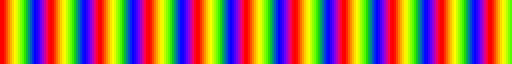

In [47]:
plt.get_cmap('prism')

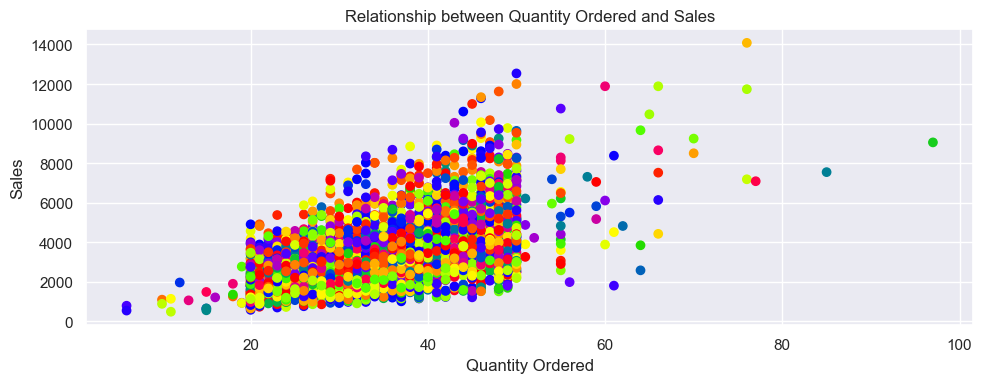

In [48]:
# Relationship between QUANTITY_ORDERED and SALES.
colors = np.linspace(0, 1, len(df['QUANTITY_ORDERED']))

plt.figure(figsize=(10, 4))
plt.scatter(df['QUANTITY_ORDERED'], df['SALES'], c = colors, cmap='prism')
plt.title('Relationship between Quantity Ordered and Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

- <p style="color:purple">
    <b style="color:purple">Positive Correlation</b>: The overall trend suggests a positive correlation between the quantity ordered and sales. As the quantity ordered increases, the sales tend to increase as well. This indicates that higher order quantities generally lead to higher sales.
</p>

- <p style="color:purple">
    <b style="color:purple">Clustering</b>: The data points seem to cluster in certain areas, with denser clusters occurring in the lower quantity and sales ranges. This might suggest that a significant portion of the orders and sales are concentrated in the lower end of the spectrum.
</p>

- <p style="color:purple">
    <b style="color:purple">Outliers</b>: There are a few data points scattered towards the higher quantity and sales ranges. These could be considered outliers as they deviate significantly from the majority of the data points.
</p>

<b style="color:purple">The outliers in the higher quantity and sales ranges represent potential opportunities for further analysis. These could be high-value customers or products that could be further targeted for growth.</b>

### Customer Segmentation

<b style="color:blue; font-size:16px">Let's do RFM Analysis</b>

- <p style="color:purple">When their last purchase was - <b style="color:green">Recency</b></p>
- <p style="color:purple">How often they purchase - <b style="color:green">Frequency</b></p>
- <p style="color:purple">How much they spend - <b style="color:green">Monetary</b></p>

In [49]:
recency = df.groupby('CUSTOMER_NAME', 
                     as_index=False)['ORDER_DATE'].max().sort_values(
    by='ORDER_DATE', ascending=False)

frequency = df.groupby('CUSTOMER_NAME', 
                       as_index=False)['ORDER_NUMBER'].count().sort_values(
    by='ORDER_NUMBER', ascending=False)

monetary = df.groupby('CUSTOMER_NAME', 
                      as_index=False)['SALES'].sum().sort_values(
    by='SALES', ascending=False)

In [50]:
# Merging the metrics into a single DataFrame
rfm = recency.merge(frequency, on='CUSTOMER_NAME').merge(monetary, on='CUSTOMER_NAME')

# Renaming columns for clarity
rfm.columns = ['CUSTOMER_NAME', 'LAST_ORDER_DATE', 'FREQUENCY', 'MONETARY']

# Top 5 Customers sorted by Frequency
rfm.sort_values(by='FREQUENCY', ascending=False).head()

,CUSTOMER_NAME,LAST_ORDER_DATE,FREQUENCY,MONETARY
1,Euro Shopping Channel,2005-05-31,259,912294.11
5,Mini Gifts Distributors Ltd.,2005-05-29,180,654858.06
44,"Australian Collectors, Co.",2004-11-29,55,200995.41
0,La Rochelle Gifts,2005-05-31,53,180124.90
53,"AV Stores, Co.",2004-11-17,51,157807.81


In [51]:
rfm['R_SCORE'] = rfm['LAST_ORDER_DATE'].rank(ascending=False)
rfm['F_SCORE'] = rfm['FREQUENCY'].rank(ascending=True)
rfm['M_SCORE'] = rfm['MONETARY'].rank(ascending=True)

# Combine the RFM scores into a single score
rfm['RFM_SCORE'] = rfm['R_SCORE'] + rfm['F_SCORE'] + rfm['M_SCORE']

rfm.head()

,CUSTOMER_NAME,LAST_ORDER_DATE,FREQUENCY,MONETARY,R_SCORE,F_SCORE,M_SCORE,RFM_SCORE
0,La Rochelle Gifts,2005-05-31,53,180124.90,1.5,89.0,88.0,178.5
1,Euro Shopping Channel,2005-05-31,259,912294.11,1.5,92.0,92.0,185.5
2,Petit Auto,2005-05-30,25,74972.52,3.5,43.0,30.0,76.5
3,Diecast Classics Inc.,2005-05-30,31,122138.14,3.5,64.5,72.0,140.0
4,Souveniers And Things Co.,2005-05-29,46,151570.98,5.5,83.5,82.0,171.0


<b style="color:purple;">Higher RFM scores indicate higher customer engagement.</b>
<p style="color:purple;">Customers with high scores are typically 
    <b style="color:green;">the most recent and frequent buyers who spend the most</b>, signaling strong engagement and loyalty.</p>

<b style="color:blue; font-size:16px;">Customer Lifetime Value (CLV)</b>

- <p style="color:purple">Average Order Value - <b style="color:green">AOV</b></p>
- <p style="color:purple">Purchase Frequency - <b style="color:green">PF</b></p>
- <p style="color:purple">Customer Lifespan - <b style="color:green">CLS</b></p>

<b style="color:black; border:2px solid green; 
          padding:5px; background-color: yellow;">CLV = 
    <b style="color:red;">AOV</b> × 
    <b style="color:red;">PF</b> × 
    <b style="color:red;">CLS</b>
</b>

In [52]:
aov = round(df['SALES'].sum() / df['ORDER_NUMBER'].count(), 2)
aov

3553.89

In [53]:
unique_orders = df['ORDER_NUMBER'].nunique()
unique_customers = df['CUSTOMER_NAME'].nunique()
pf = round(unique_orders / unique_customers, 2)
pf

3.34

In [54]:
# First and last order dates
first_order = df.groupby('CUSTOMER_NAME')['ORDER_DATE'].min()
last_order = df.groupby('CUSTOMER_NAME')['ORDER_DATE'].max()

# Let's merge to get customer lifespan
cls = (last_order - first_order).dt.days
avg_ls_years = round(cls.mean() / 365, 2)
avg_ls_years

1.18

In [55]:
clv = round(aov * pf * avg_ls_years, 2)
clv

14006.59

<p style="color:purple;">With this CLV value, we can now estimate the value each customer brings over their lifetime. This is crucial for strategic planning and resource allocation.</p>

<b style="color:blue; font-size:16px;">Profit Analysis</b>

In [56]:
# Assuming cost is 70% of the unit price (As it's not available in our data)
df['COST'] = df['UNIT_PRICE'] * 0.7  

df['PROFIT'] = df['SALES'] - (df['COST'] * df['QUANTITY_ORDERED'])

profit_by_product = df.groupby('PRODUCT_LINE', 
                               as_index=False)['PROFIT'].sum().sort_values(
    by='PROFIT', ascending=False)

profit_by_product

,PRODUCT_LINE,PROFIT
0,Classic Cars,1841633.180
6,Vintage Cars,752202.405
1,Motorcycles,486627.937
5,Trucks and Buses,464641.214
2,Planes,360444.023
3,Ships,239878.850
4,Trains,83580.488


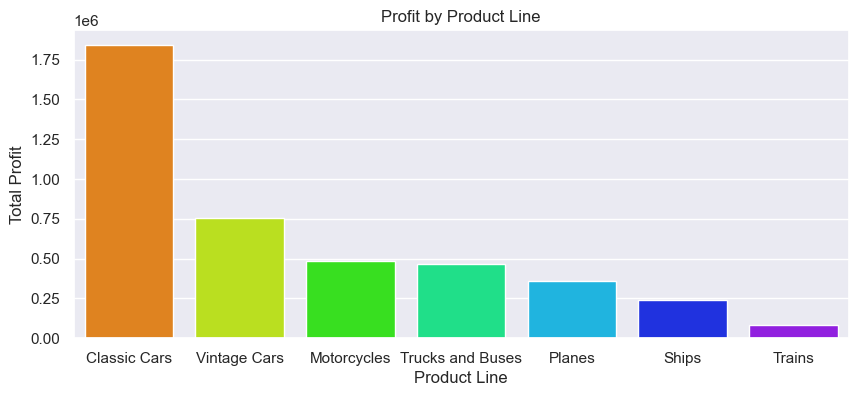

In [57]:
sns.set(rc = {'figure.figsize':(10, 4)})
sns.barplot(data = profit_by_product, x = 'PRODUCT_LINE', y = 'PROFIT', 
            hue = 'PRODUCT_LINE', palette = 'gist_rainbow')
plt.title('Profit by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Profit')
plt.show()

<p style="color:purple;">From the above Analysis, we can identify 
    <b style="color:green;">Which Product Lines</b> are the 
    <b style="color:green;">Most Profitable</b>, allowing us to focus on 
    <b style="color:green;">High-Margin Products</b>.
</p>

- <b style="color:purple;">So, from our graph, we can clearly see that 
    <b style="color:green;">Classic Cars</b> are the Most Profitable. While, 
    <b style="color:red;">Trains</b> are at the lower end of the spectrum.</b>

In [58]:
# Profit over Time
profit_over_qtr = df.groupby('QTR_ID')['PROFIT'].sum().reset_index()
profit_over_qtr

,QTR_ID,PROFIT
0,1,982949.711
1,2,856796.628
2,3,745306.351
3,4,1643955.407


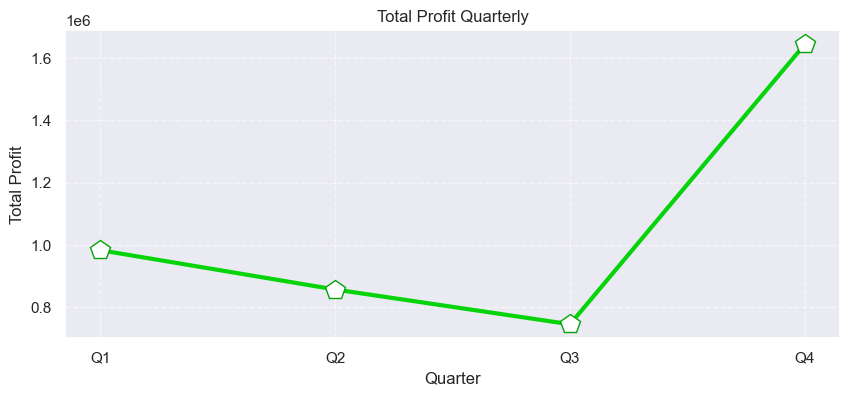

In [59]:
qtr_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}

plt.figure(figsize=(10, 4))
plt.plot(profit_over_qtr['QTR_ID'], profit_over_qtr['PROFIT'], 
         'p', ms = 15, mfc = 'w', mec = '#05a30b', ls = '-', lw = 3, c = '#06d40a')
plt.title('Total Profit Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Total Profit')

plt.xticks(ticks=profit_over_qtr['QTR_ID'], 
           labels=[qtr_labels[q] for q in profit_over_qtr['QTR_ID']])

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<p style="color:purple">From this graph, we can see the overall trend of profits across each quarter. There's an indication of profit fluctuation from one quarter to the next.</p>

- <b style="color:purple">Specific quarters with peaks or dips might point to seasonal or operational factors impacting profitability, providing an opportunity to investigate underlying causes in low-performing quarters and leverage strategies in high-performing ones.</b>

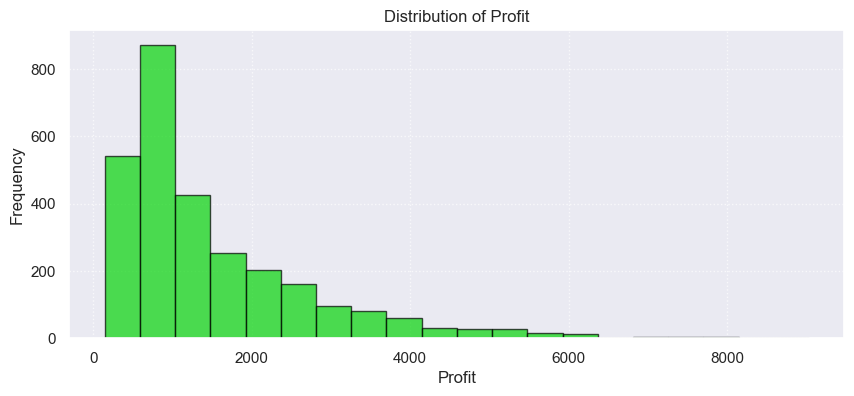

In [60]:
# Distribution of PROFIT
plt.figure(figsize=(10, 4))
plt.hist(df['PROFIT'], bins=20, color='#06d40a', edgecolor='black', alpha=0.7)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

<div style="color:purple; border:2px solid green; padding:5px; ">
From this graph, we observe:
    <ul style="color:green;">
        <li><b>Shape:</b>The distribution is right-skewed. This indicates that a majority of the observations have lower profit values, with a few outliers on the higher end.</li>
        <li><b>Central Tendency:</b>The distribution seems to be centered around the 1000-2000 profit range. This could be the typical profit range for this dataset.</li>
        <li><b>Spread:</b>The distribution is fairly spread out, with values ranging from 0 to over 8000. This suggests variability in the profit levels.</li>
    </ul>
This histogram suggests that most of the profits are concentrated in the lower range, with a few instances of significantly higher profits. This could be due to various factors like product demand, pricing strategies, or operational efficiency.
</div>

### Visual Enhancements

<b style="color:blue; font-size:16px;">Heatmaps</b>

In [61]:
sales_by_month_and_product = df.pivot_table(
    index='MONTH_ID', columns='PRODUCT_LINE', values='SALES', aggfunc='sum')
sales_by_month_and_product

PRODUCT_LINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
MONTH_ID,,,,,,,
1,303070.56,81113.88,46715.81,61287.40,19026.58,78530.63,196129.58
2,299647.80,122801.68,107905.65,68247.96,16507.95,68211.07,127119.79
3,277560.54,60469.98,79735.05,74341.94,22581.27,61877.34,177935.27
4,263252.00,119606.88,103359.77,33683.45,4756.47,28790.76,115941.63
5,365946.75,108335.97,74929.05,56156.30,20457.34,151270.15,146877.00
6,137419.98,49879.42,68765.93,53274.53,10071.06,60777.51,74568.35
7,245292.95,60698.23,40915.32,22532.62,10802.20,64270.07,70364.58
8,265302.43,106869.84,67352.01,52250.37,16168.12,49943.29,101424.51
9,234673.08,45626.63,34785.62,45715.23,12479.84,85297.65,126146.22


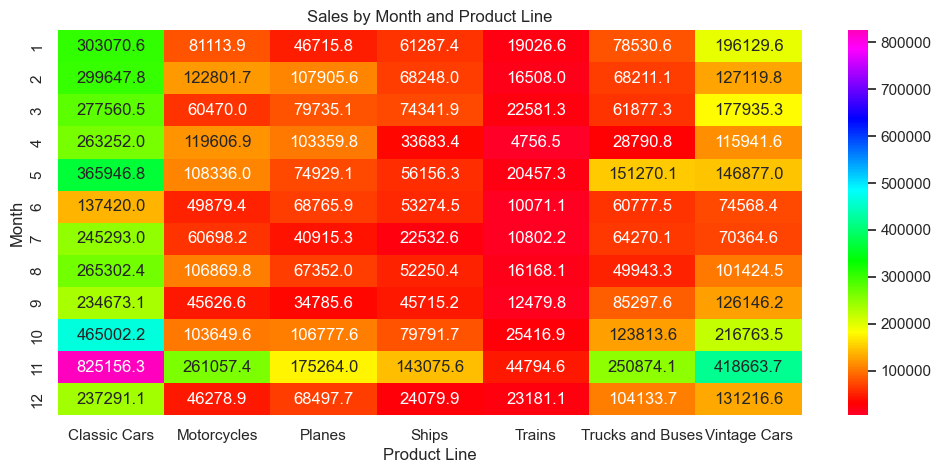

In [62]:
plt.figure(figsize=(12, 5))
sns.heatmap(data = sales_by_month_and_product, cmap = 'gist_rainbow', 
            annot = True, fmt = '.1f')

plt.title('Sales by Month and Product Line')
plt.xlabel('Product Line')
plt.ylabel('Month')
plt.show()

<p style="color:purple;">The heatmap displays the 
    <b style="color:green;">total sales</b> for each 
    <b style="color:green;">product line</b> across different 
    <b style="color:green;">months</b>. The intensity of the color in each cell represents the 
    <b style="color:green;">sales volume</b>, with darker shades indicating 
    <b style="color:green;">higher sales</b>. By visually examining this heatmap, we can quickly identify seasonal trends and patterns in product performance.</p>
    
<p style="color:purple;">For instance, we can see which months have peak sales for specific product lines, aiding in targeted sales strategies and inventory management.</p>

### Conclusion

<p style="color:purple;">In this project, we enhanced the 
    <b style="color:green;">Customer Sales Analysis</b> by meticulously cleaning and transforming the dataset, revealing crucial insights into sales patterns and trends. Through various visualizations, including 
    <b style="color:green;">boxplots</b>, 
    <b style="color:green;">bar charts</b>, and 
    <b style="color:green;">time series analysis</b>, we identified 
    <b style="color:green;">outliers</b>, 
    <b style="color:green;">seasonal effects</b>, and 
    <b style="color:green;">customer distribution</b> across regions. The addition of new metrics like 
    <b style="color:green;">Discounts</b> and 
    <b style="color:green;">Customer Lifetime Value</b> further deepened our understanding of sales dynamics. Overall, this improved analysis not only showcases the effectiveness of data visualization techniques but also provides actionable insights for strategic decision-making in sales optimization.</p>

---------------